# Linear Regression on COVID-19 Vaccination Progress

We will use the COVID-19 Vaccination dataset from Kaggle ([link](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)).

This tutorial is modified from https://www.kaggle.com/mrinalchandramishra/predicting-vaccination-done-in-future
1. Dataset Overview and basic visualisation
2. Linear regression model
3. K-means clustering 

In [1]:
# # install python packages using pip
# !pip install pandas --quiet
# !pip install seaborn --quiet
# !pip install missingno --quiet
# # monitor cpu/ram usage 
# !pip install jupyterlab-system-monitor

In [2]:
# import python packages we just installed
# %matplotlib widget
import pandas as pd
import seaborn as sns
import missingno as msno  # for visualizing missing values
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# you might need to specify your own data path
path = "data/"

# 1. Dataset Overview and basic visualisation

Firstly, let's have an overview of the dataset 
* 1. load data into a pandas DataFrame using pd.read_csv()
* 2. randomly sample 5 data points from your DataFrame 

In [5]:
df=pd.read_csv(path + 'country_vaccinations.csv')
df.sample(5)    

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1965,Anguilla,AIA,2021-03-04,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,4893.0,"Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://ais.paho.org/imm/IM_DosisAdmin-Vacunac...
72281,Taiwan,TWN,2021-06-01,NaN,NaN,NaN,NaN,30296.0,NaN,NaN,NaN,1270.0,"Medigen, Moderna, Oxford/AstraZeneca, Pfizer/B...",Taiwan Centers for Disease Control,https://www.cdc.gov.tw/Category/Page/9jFXNbCe-...
63137,San Marino,SMR,2021-08-07,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN,970.0,"Pfizer/BioNTech, Sputnik V",World Health Organization,https://covid19.who.int/
72845,Tajikistan,TJK,2022-02-15,NaN,NaN,NaN,NaN,48483.0,NaN,NaN,NaN,4973.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",World Health Organization,https://covid19.who.int/
22123,El Salvador,SLV,2021-05-09,NaN,NaN,NaN,NaN,26811.0,NaN,NaN,NaN,4113.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Health,https://covid19.gob.sv/


We can find NaN in the data, which means some records are missing.

Let first look how many data we have in this dataset by printing the shape of the dataframe

In [9]:
# show the shape of the dataframe
print(f'shape of data is: {df.shape}')

shape of data is: (81976, 15)


Let's use a function called df.info() to have a concise summary of the data.

In [10]:
# print a concise summary of a DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81976 entries, 0 to 81975
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              81976 non-null  object 
 1   iso_code                             81976 non-null  object 
 2   date                                 81976 non-null  object 
 3   total_vaccinations                   41873 non-null  float64
 4   people_vaccinated                    39638 non-null  float64
 5   people_fully_vaccinated              37119 non-null  float64
 6   daily_vaccinations_raw               34033 non-null  float64
 7   daily_vaccinations                   81697 non-null  float64
 8   total_vaccinations_per_hundred       41873 non-null  float64
 9   people_vaccinated_per_hundred        39638 non-null  float64
 10  people_fully_vaccinated_per_hundred  37119 non-null  float64
 11  daily_vaccinations_per_milli

By combining multiple operation together, we can simplify our code.

Let's combine df.isnull() function and df.sum() function to count the total missing records inside the data

In [11]:
# counting missing values
print('\n Missing Values Summary: \n')
df.isnull().sum()


 Missing Values Summary: 



country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     40103
people_vaccinated                      42338
people_fully_vaccinated                44857
daily_vaccinations_raw                 47943
daily_vaccinations                       279
total_vaccinations_per_hundred         40103
people_vaccinated_per_hundred          42338
people_fully_vaccinated_per_hundred    44857
daily_vaccinations_per_million           279
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

let's create a heatmap to visualize null values by using function missingno.matrix() 

<AxesSubplot:>

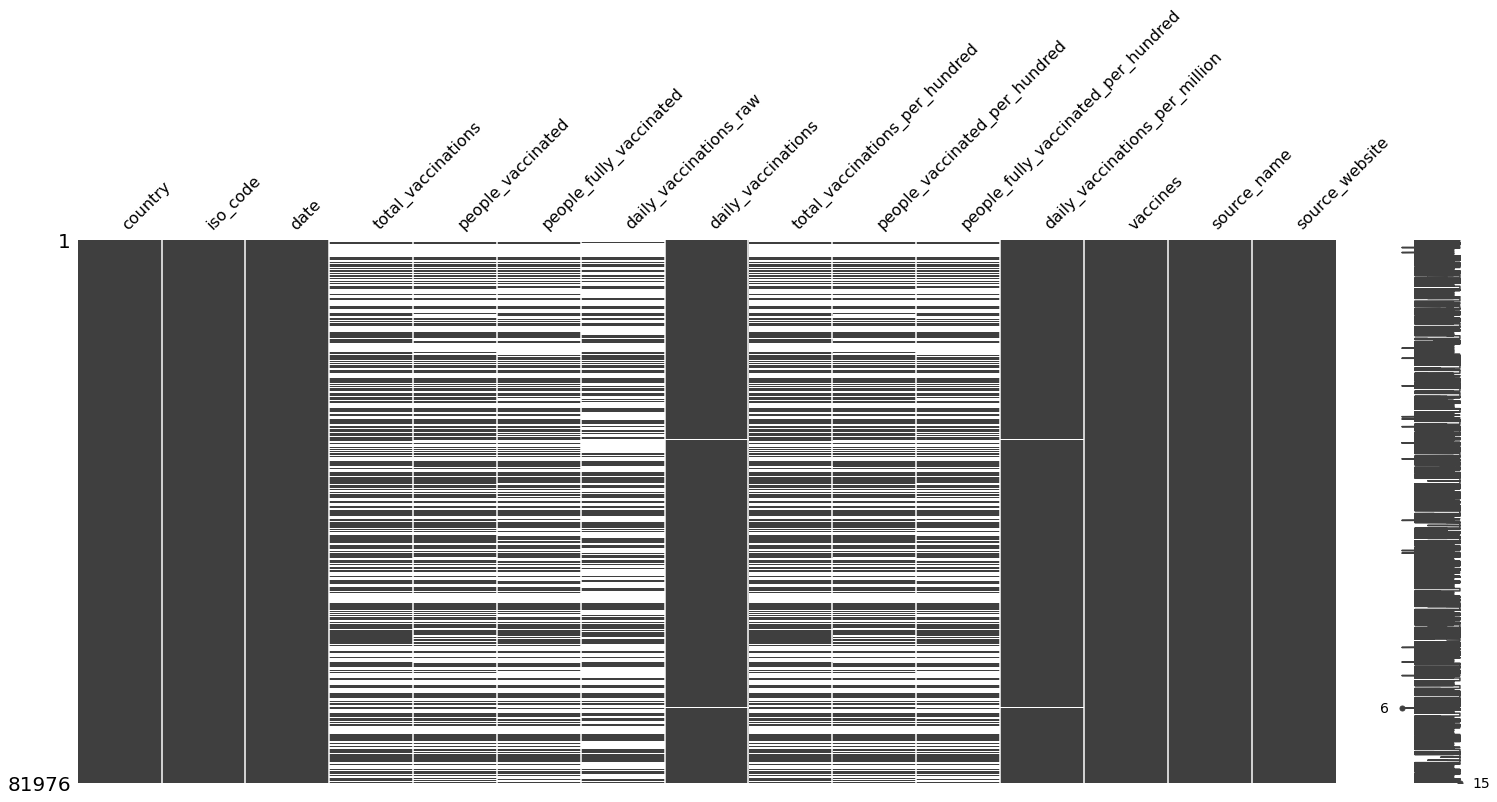

In [12]:
# missing data visualisation 
msno.matrix(df)

nomally we will need to handle the missing data in the dataset, but it is not the main focus of this tutorial. We will skip this procedure. 

the next step we normally do is to visualise the pair-wise linear correlation among features

* by calling df.corr() and pass parameters with 'pearson', it will calculate the pearson correlation between features.
* we use sns.heatmap() to visualise it

Text(0.5, 1.0, 'Correlation Between different Features')

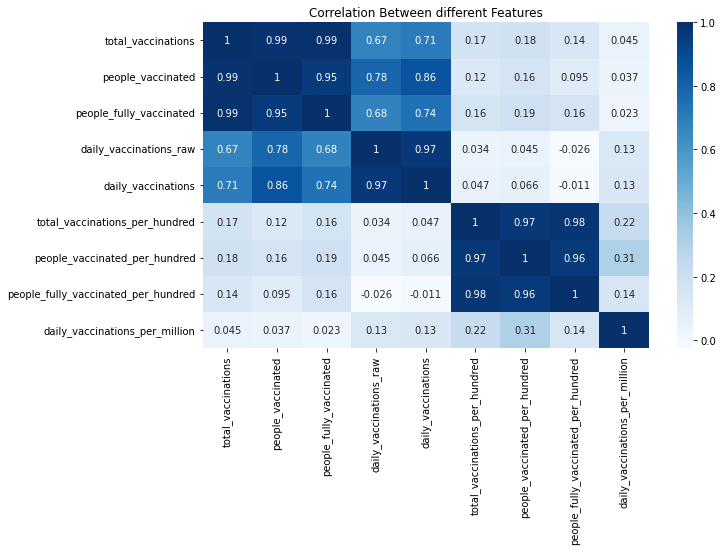

In [13]:
# first of all lets check about correlation in our data
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(df.corr('pearson'),annot=True,cmap="Blues")
plt.title('Correlation Between different Features')

we can further plot the data to verify the linear correlation between features

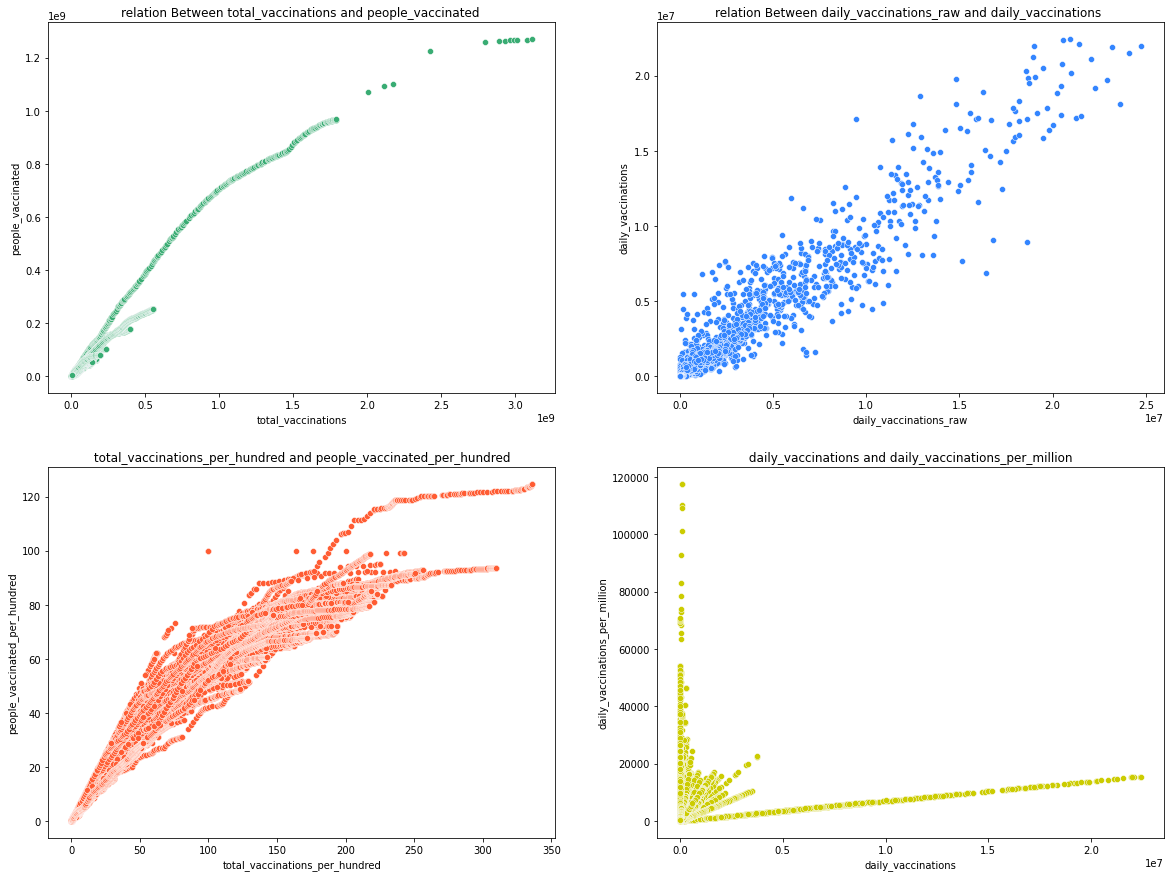

In [14]:
fig, ax = plt.subplots(2,2,figsize=(20,15))
#fig 1
sns.scatterplot(x=df['total_vaccinations'], y=df['people_vaccinated'],ax=ax[0][0],color='#39ac73')
ax[0,0].set_title('relation Between total_vaccinations and people_vaccinated ')
#fig 2
sns.scatterplot(x=df['daily_vaccinations_raw'], y=df['daily_vaccinations'], color='#3385ff',ax=ax[0][1])
ax[0][1].set_title('relation Between daily_vaccinations_raw and daily_vaccinations ')
#fig 3
sns.scatterplot(x=df['total_vaccinations_per_hundred'], y=df['people_vaccinated_per_hundred'], color='#ff5c33',ax=ax[1][0])
ax[1][0].set_title(' total_vaccinations_per_hundred and people_vaccinated_per_hundred ')
#fig 4
sns.scatterplot(x=df['daily_vaccinations'],y=df['daily_vaccinations_per_million'], color='#cccc00',ax=ax[1][1])
ax[1][1].set_title(' daily_vaccinations and daily_vaccinations_per_million ')
plt.show()

Let's do some visualisation 

1. List the top 10 countries by the total number of people get vaccinated in descending order

<AxesSubplot:title={'center':'Top 10 countries based on the vaccinated population'}, xlabel='country', ylabel='daily_vaccinations'>

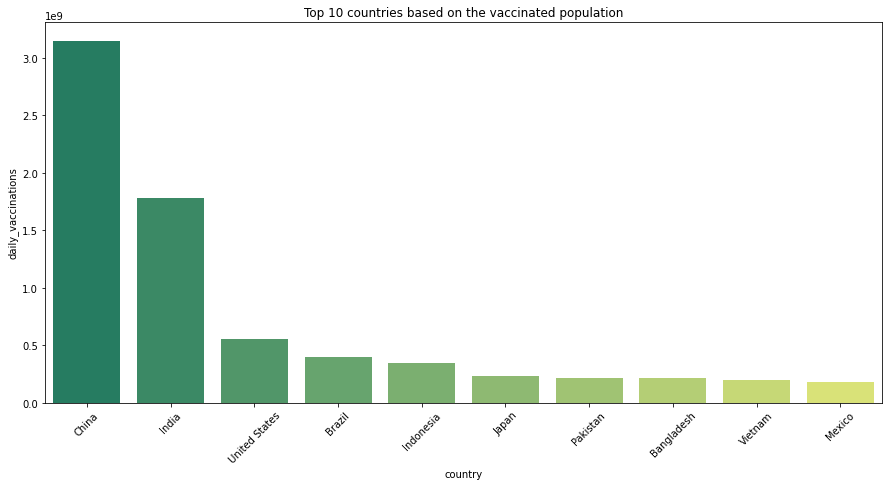

In [15]:
sum_df=df.groupby('country').sum().sort_values(by='daily_vaccinations',ascending=False)[:10]
fig,ax=plt.subplots(figsize=(15,7))
plt.title('Top 10 countries based on the vaccinated population')
plt.xticks(rotation=45)
sns.barplot(x=sum_df.index,y=sum_df['daily_vaccinations'],palette='summer')

2. List the top 10 countries by the Average Number of people vaccinated per hundred in descending order


<AxesSubplot:title={'center':'Average Number of people vaccinated per hundred by country'}, xlabel='country', ylabel='people_vaccinated_per_hundred'>

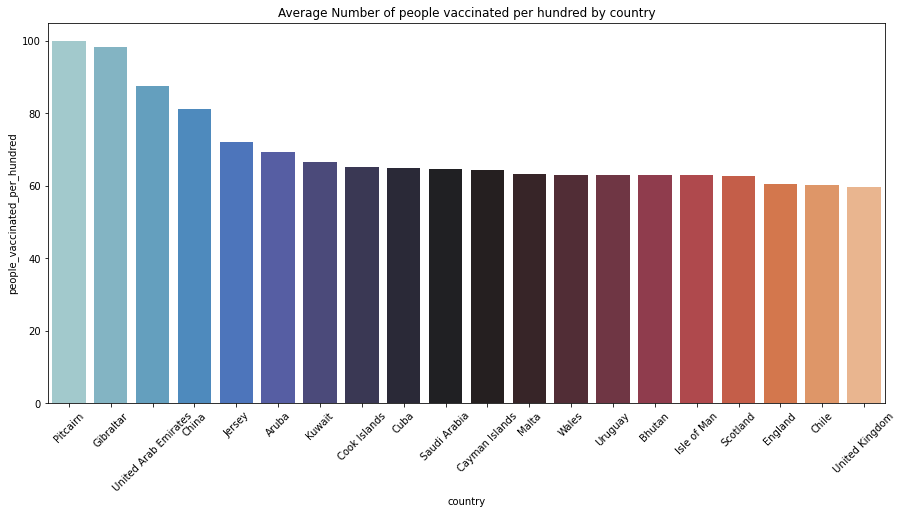

In [16]:
mean_df=df.groupby('country').mean().sort_values(by='people_vaccinated_per_hundred',ascending=False)[:20]
fig,ax=plt.subplots(figsize=(15,7))
plt.title('Average Number of people vaccinated per hundred by country')
plt.xticks(rotation=45)
sns.barplot(x=mean_df.index,y=mean_df['people_vaccinated_per_hundred'],palette='icefire')

<div class="alert alert-block alert-warning">
<b>Task: Show top 10 countries by total number of people vaccinated during February in descending order
    
* check pd.to_datatime() function
* create a date mask to select data between 2022/02/01 and 2022/03/01 and use pandas.DataFrame.loc() to select the data
* check pd.groupby() functions: pandas.DataFrame.groupby() and pandas.DataFrame.sort_values()
</b>
</div>

In [1]:
### your solution  



df['date']=pd.to_datetime(df['date'])
mask = (df['date'] >= '2022-2-1') & (df['date'] < '2022-3-1')
masked_df = df.loc[mask]

mean_df=masked_df.groupby('country').sum().sort_values(by='daily_vaccinations',ascending=False)[:10]
fig,ax=plt.subplots(figsize=(15,10))
plt.title('Total Number of people vaccinated during February')
plt.xticks(rotation=60)
sns.barplot(x=mean_df.index,y=mean_df['daily_vaccinations'],palette='icefire')

# 2. Linear Regression

To build linear regression model using sklearn
* you just import the function from sklearn.linear_model
* then initialise your linear regression model  

In [18]:
from sklearn.linear_model import LinearRegression
# creating model
linear_regression_model=LinearRegression(n_jobs=1)

In [19]:
%time
# now we have added one more columns that is difference of date
# now we will see that how many vaccines are vaccinated each day
df['date']=pd.to_datetime(df['date'])
dt=df.groupby('date').sum() # the number of row is decided by the number of date in the data
dt['date_diff']=np.arange(len(dt['total_vaccinations']))

# lets create our x and Y variable
x=dt[['date_diff']]
y=dt['total_vaccinations']
linear_regression_model.fit(x,y)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 9.3 µs


LinearRegression(n_jobs=1)

by passing different number of 'n_jobs' to our sklearn model, we are basically telling how many cpu cores our model should use

In [20]:
linear_regression_model=LinearRegression(n_jobs=-1)

In [21]:
%time
# now we have added one more columns that is difference of date
# now we will see that how many vaccines are vaccinated each day
df['date']=pd.to_datetime(df['date'])
dt=df.groupby('date').sum() # the number of row is decided by the number of date in the data
dt['date_diff']=np.arange(len(dt['total_vaccinations']))

# lets create our x and Y variable
x=dt[['date_diff']]
y=dt['total_vaccinations']
linear_regression_model.fit(x,y)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 9.06 µs


LinearRegression(n_jobs=-1)

In [23]:
# show the coefficient(weight)
print(linear_regression_model.coef_)

# show the intercept(bias)
print(linear_regression_model.intercept_)

[23556412.92394385]
-1543002423.9235706


In [24]:
#let's predict after 1 year how many vaccines will be made i.e 365 days so our x value will be 365
y_hat=linear_regression_model.predict(x)

<AxesSubplot:title={'center':'Best Fit Line'}, xlabel='date_diff', ylabel='total_vaccinations'>

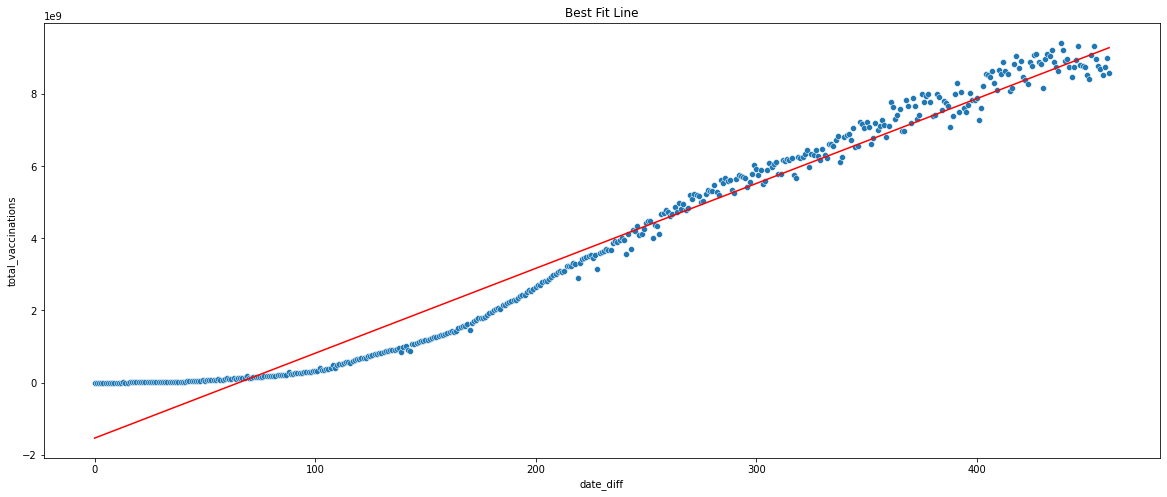

In [25]:
#lets visualize our total vaccination by day
fig,ax=plt.subplots(figsize=(20,8))
plt.title('Best Fit Line')
sns.scatterplot(x=dt['date_diff'],y=dt['total_vaccinations'])
sns.lineplot(x=x.to_numpy().squeeze(), y=y_hat, color='r')

# 3. K-means

an example of using sklearn.cluster.KMeans to do clustering.
* try to change the 'n_clusters' with different number, and see how it change the results(i.e. n_clusters=20)

In [26]:
from sklearn.cluster import KMeans

dt=df.groupby('country', as_index=False).sum().sort_values(by=['total_vaccinations'], ascending=False)[10:30]
dt=dt[['country','total_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'daily_vaccinations']]

kmeans = KMeans(n_clusters=2).fit(dt[['total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'daily_vaccinations']])
centroids = kmeans.cluster_centers_
print(centroids)

[[3.30879458e+04 1.68503375e+04 7.79244793e+07]
 [1.75641413e+04 9.32284875e+03 1.84904804e+08]]


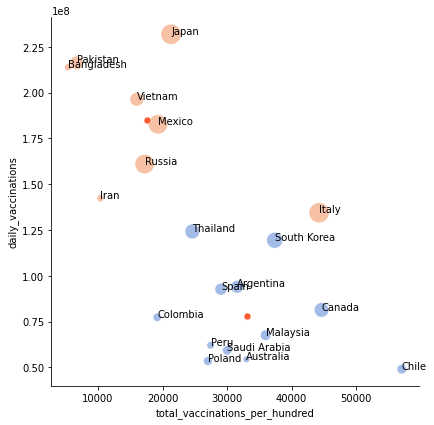

In [27]:
sns.relplot(x=dt['total_vaccinations_per_hundred'], y=dt['daily_vaccinations'], hue=kmeans.labels_.astype(float), size="total_vaccinations",
            sizes=(40, 400), alpha=.5, palette="muted", legend=False,
            height=6, data=dt)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 2], color='#ff5c33', s=50)
for i in range(len(dt)):
    country = dt.iloc[i].country
    plt.text(dt.total_vaccinations_per_hundred[dt.country==country],dt.daily_vaccinations[dt.country==country],country)


# 4. scikit learn multicore benchmark (optional)

* comparing the training time of a random forest classifier model running on different number of cpu cores

### adopted from: https://towardsdatascience.com/leverage-multicore-for-faster-performance-in-scikit-learn-147c374ad2d3

In [50]:
# from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from time import time
from matplotlib import pyplot as plt
import pandas as pd

In [28]:
X = pd.read_pickle("data/creditcard_dataset_features.pd")
y = pd.read_pickle("data/creditcard_dataset_labels.pd")

In [56]:
#about 15 mins to run on OOD 16 core XLarge
timetaken = []
n_cores = [1, 2, 4, 8, 12]

for n in n_cores:
    start = time()
    model = RandomForestClassifier(n_estimators=100,
                                   random_state=42, n_jobs=n)
    model.fit(X, y)
    end = time()
    elapsedtime = end - start
    timetaken.append(elapsedtime)


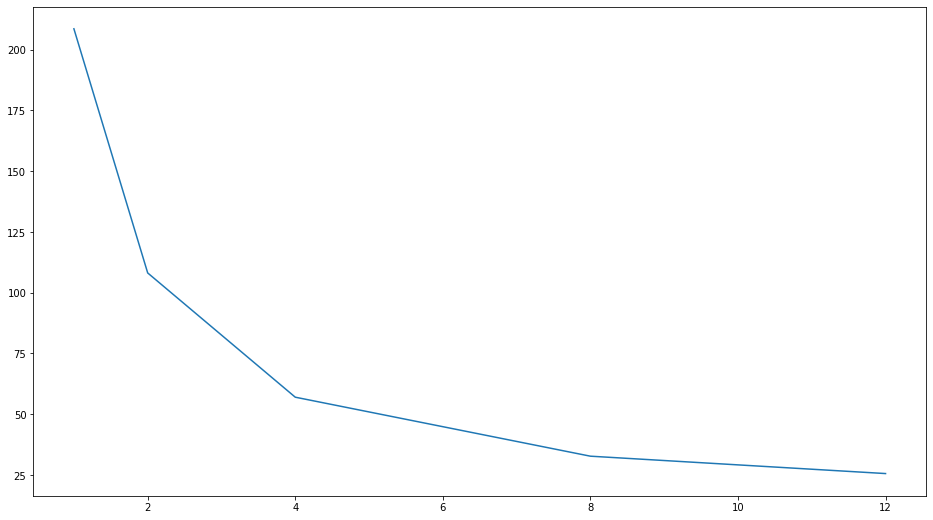

In [57]:
fig = plt.figure(50,figsize=(16,9))
plt.plot(n_cores, timetaken)
plt.show()